In [47]:
#hide
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
#hide
sns.set_style('dark')

# Motivation
For many, logistic regression is the first classification algorithm they encounter in the world of data science. It is often described as a process of drawing a line to separate two groups of samples. Understanding statistical implication of logistic regression allows one to understand more sophisticated classification algorithm. This post aims to summarise the fundamentals of logistic regression in easy-to-understand bullet points.

# The Essenstials

##### Logistic regression assumes that there are only two potential outcomes.
$$
y \in \{0, 1\} \\
$$
where y is dependent variable. y is also called target. When more than 2 categories are present, one vs rest approach can be used.

##### Logistic regression treats y as a random variable which follows Bernoulli distribution.
$$
\begin{aligned}
y|x;\theta & \sim \text{Bernoulli}(\phi)\\
P(y = 1) & = \phi \\
P(y = 0) & = 1 - \phi
\end{aligned}
$$
where y is dependent variable, x is independent variable and $\phi$ is the probability for y being equal to 1.

#####  Logistic regression outcome predicts logit or odd ratio.
$$
logit = log \left(\frac{p}{1-p} \right) = \theta^T x
$$
Logistic regression is often more clearly explained with the above equation. Logit or odd ratio is modeled as a linear expression. In turn, probability is a nonlinear function of the logit function.

##### Hypothesis function is a nonlinear function of a linear function of x.

$$
\begin{aligned}
h_{\theta}(x) = & g(\theta^{T}x)\\
= & \frac{1}{1+e^{-\theta^{T}x}}
\end{aligned}
$$

The nonlinear function g(x) is also called sigmoid function. This specific nonlinear function leads to the gradient descent update rule identical to linear regression.

##### Logistic regression algorithm is a process of maximum likelihood estimation for population that follow Bernoulli distribution.

Bernoulli distribution is summarised in the following form:
$$
\begin{aligned}
P(y = 1) & = \phi \\
P(y = 0) & = 1 - \phi
\end{aligned}
$$
Putting the above equations compactly,
$$
P(y|x;\theta) = (h_{\theta}(x))^y(1 - h_\theta(x))^{(1-y)}
$$
If we assume that the data points are sampled independently from each other, we can calculate the likelihood of the parameters. Likelihood can be represented as a product of the probabilities for all training samples.

$$
\begin{aligned}
L(\theta) & = P(\vec{y}|X;\theta) \\
& = \prod^{n}_{i = 1} p(y^{(i)}|x^{(i)};\theta) \\
& = \prod^{n}_{i = 1} (h_{\theta}(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{(1-y^{(i)})}
\end{aligned}
$$

where $\vec{y}$ denotes all y samples.  
Now we have the expression for the likelihood for the parameters $\theta$. Naturally, we'd like to approximate $\theta s$ that maximise the likelihood. We will do this by taking derivative of the likelihood estimation. In order to make the differentiation more straight forward, we will take log of the likelihood expression. Taking log transforms $\prod$ into $\sum$ which is much easier to differentiate. Because logarithm is a strictly monotonically increasing function, $\theta$s that maximise the log likelihood also maximises the likelihood funcion.

$$
\begin{aligned}
l(\theta) & = log L(\theta) \\
& = \sum^{n}_{i=1} y^{(i)}(h_{\theta}(x^{(i)})) + (1-y^{(i)}) (1 - h_\theta(x^{(i)}))
\end{aligned}
$$

In order to solve for the derivative of the above expression, it is easier to first take derivative of sigmoid function which is inside the hypothesis function.

$$
\begin{aligned}
g(z) & = \frac{1}{1+e^{-z}} \\
\frac{dg}{dz} & = \frac{1}{\left( 1+e^{-z} \right)^2} e^{-z} \\
& = \frac{1}{1+e^{-z}} \left( 1 - \frac{1}{1+e^{-z}} \right) \\
& = g(z) \left( 1 - g(z) \right)
\end{aligned}
$$

Now taking derivative of the log likelihood

$$
\begin{aligned}
l(\theta) 
& = \sum^{n}_{i=1} y^{(i)}(h_{\theta}(x^{(i)})) + (1-y^{(i)}) (1 - h_\theta(x^{(i)})) \\
& = \sum^{n}_{i=1} y^{(i)}(g(\theta^{T}x)) + (1-y^{(i)}) (1 - g(\theta^{T}x))
\end{aligned}
$$

$$
\begin{aligned}
\frac{\delta}{\delta (\theta_j)} l(\theta) 
& = \left(y \frac{1}{g(\theta^{T}x)} - (1-y) \frac{1}{1 - g(\theta^Tx)} \right) \frac{\delta}{\delta \theta_j} g(\theta^{T} x)\\
& \text{Here use the expression for the derivative of sigmoid} \\
& = \left(y \frac{1}{g(\theta^{T}x)} - (1-y) \frac{1}{1 - g(\theta^Tx)} \right) \frac{\delta}{\delta \theta_j} g(\theta^{T} x)(1-g(\theta^{T} x)) \frac{\delta}{\delta \theta_j} \theta^Tx\\
& = \left( y(1-g(\theta^{T} x)) - (1-y)g(\theta^{T} x) \right) x_j\\
& = \left( y - g(\theta^{T} x) \right) x_j\\
& = (y-h_\theta(x))x_j
\end{aligned}
$$

Now we have all the ingredients for the update rule for $\theta$.

$$
\begin{aligned}
\theta_j 
& := \theta_j + \alpha \nabla_{\theta_j} l(\theta_j) \\
& := \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}
\end{aligned}
$$

The update rule is identical to linear regression. This is the result of carefully choosing sigmoid as the nonlinear function within the hypothesis function. Linear regression and logistic regression are both members of a more broad family of models called generalised linear model.

##### What do the logistic regression coefficients actually indicate?
As previously mentioned, logistic regression models log odd ratio as a linear equation.
$$
\begin{aligned}
logit 
& = log \left(\frac{p}{1-p} \right) \\
& = \theta^T x \\
& = \theta_0 + \theta_1x_1 + \ldots + \theta_n x_n
\end{aligned}
$$
where $\theta_0$ is the intercept, $\theta_1 \ldots \theta_n$ are regression coeffiecients and $x_1 \ldots x_n$ are features.

As it is clearly seen in the equations above, regression coefficients are linearly proportional to the logit function.  
A unit change in the feature with the coefficient of $\theta$ changes the probability of positive prediction by $e^{\theta}$.

##### Interpreting logistic regression result.
- **Hypothesis for the overall model**  
The null hypothesis states that all coefficients except the intercept are zero. A rejection of this hypothesis implies that at least one coefficient is not zero in the population. This in turns indicate that the regression model predicts the probability of the outcome better than the intercept only model. The intercept only model predicts the majority target.  The significance of the overall model is tested chi squared test of log likelihood ratio.


- **Hypothesis for each predictor (feature)**  
The null hypothesis states that the predictor is a significant predictor of the outcome. This is commonly done by Wald test. A coefficient is divided by standard which gives z-score. Z-score allows us to calculate p-value.

##### Log likelihood ratio test

The LR test is performed by estimating two models and comparing the fit of one model to the fit of the other. Removing predictor variables from a model will almost always make the model fit less well (i.e., a model will have a lower log likelihood), but it is necessary to test whether the observed difference in model fit is statistically significant. The LR test does this by comparing the log likelihoods of the two models, if this difference is statistically significant, then the less restrictive model (the one with more variables) is said to fit the data significantly better than the more restrictive model. If one has the log likelihoods from the models, the LR test is fairly easy to calculate. The formula for the LR test statistic is:
$$
LR = -2ln\frac{L(m_1)}{L(m_2)} = 2(log(L(m_2)) - log(L(m_1)))
$$
Where  $L(m_n)$ denotes the likelihood of the respective model (either Model 1 or Model 2), and $log(L(m_n))$ the natural log of the model’s final likelihood (i.e., the log likelihood). Where $m_1$ is the more restrictive model, and $m_2$ is the less restrictive model.



##### Walt test

The Wald test works by testing the null hypothesis that a parameter is equal to 0. If the test fails to reject the null hypothesis, this suggests that removing the variable from the model will not substantially harm the fit of that model, since a predictor with a coefficient that is very small relative to its standard error is generally not doing much to help predict the dependent variable. The Wald test can be used to test multiple parameters simultaneously, while the tests typically printed in regression output only test one parameter at a time.

# Logistic regression with statsmodels

In [84]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data = datasets.load_iris()

In [70]:
# take of two targets for simplicity
target = data['target'][:100]
feature = data['data'][:100, :]
feature = pd.DataFrame(feature, columns=data['feature_names'])
feature = feature + np.random.randn(100, 4)
feature['target'] = target

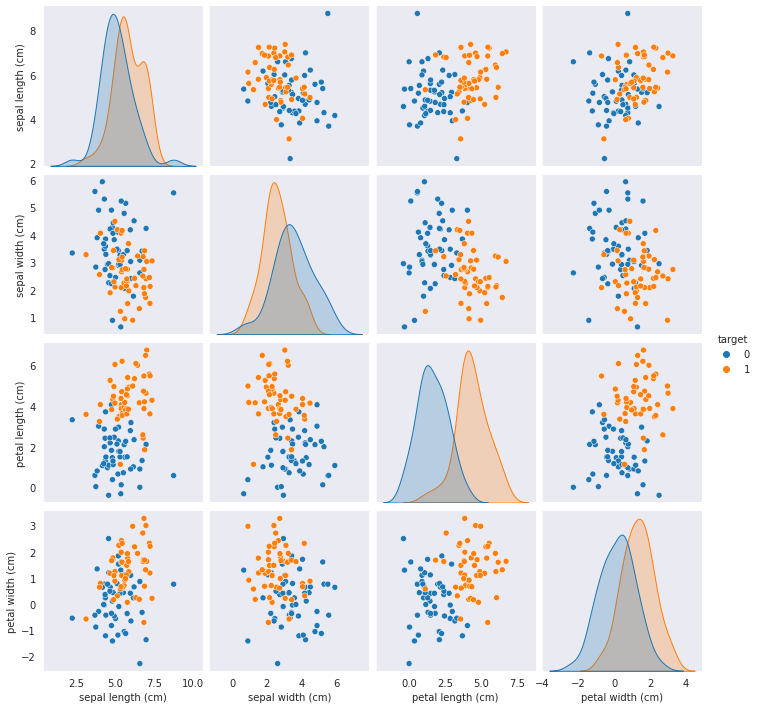

In [73]:
sns.pairplot(feature, hue = 'target')

In [76]:
X = feature[['petal length (cm)', 'petal width (cm)']]
y = feature['target']
X = sm.add_constant(X)

model = sm.Logit(endog = y, exog=X, )
model = model.fit(maxiter = 35)

Optimization terminated successfully.
         Current function value: 0.156997
         Iterations 9


In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Apr 2021   Pseudo R-squ.:                  0.7735
Time:                        12:12:40   Log-Likelihood:                -15.700
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 5.192e-24
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.9109      2.043     -4.361      0.000     -12.916      -4.906
petal length (cm)     2.5717      0.613      4.198      0.000       1.371       3.772
petal width (cm)      2.0931      0.635      3.295      0.001       0.848       3.338
=====================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Visualising decision line

In [94]:
slope = -(model.params[1]/model.params[2])
intersect = -(model.params[0]/model.params[2])

In [109]:
X_line = np.arange(0, 7, 3)
y_line = X_line*slope + intersect 

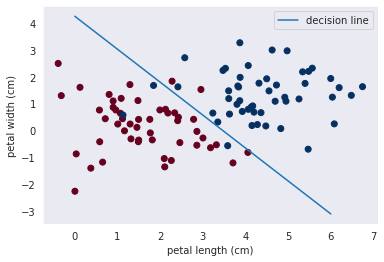

In [114]:
X = feature[['petal length (cm)', 'petal width (cm)']]
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = y, cmap = 'RdBu')
plt.plot(X_line, y_line, label = 'decision line')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend();